# 09_1.Two-Way ANOVA
- https://pingouin-stats.org/build/html/generated/pingouin.anova.html#pingouin.anova

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install pingouin

#  *** 런타임 다시 시작

In [1]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [2]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [3]:
twa_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/09_1.TWA.csv', encoding="cp949")
twa_df.head()

,온도,방법,맛점수1,맛점수2,맛점수3
0,1,1,84,93,84
1,1,1,87,91,87
2,1,1,85,92,85
3,1,1,89,96,89
4,1,1,85,95,85


### 2.2 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [4]:
twa_df['온도'].replace({1:'200도', 2:'300도'}, inplace=True)
twa_df['방법'].replace({1:'오븐', 2:'기름'}, inplace=True)
twa_df['온도'] = twa_df['온도'].astype('category')
twa_df['방법'] = twa_df['방법'].astype('category')

twa_df.head()

,온도,방법,맛점수1,맛점수2,맛점수3
0,200도,오븐,84,93,84
1,200도,오븐,87,91,87
2,200도,오븐,85,92,85
3,200도,오븐,89,96,89
4,200도,오븐,85,95,85


### 2.3 자료구조 살펴보기

In [5]:
twa_df.shape

(60, 5)

In [6]:
twa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   온도      60 non-null     category
 1   방법      60 non-null     category
 2   맛점수1    60 non-null     int64   
 3   맛점수2    60 non-null     int64   
 4   맛점수3    60 non-null     int64   
dtypes: category(2), int64(3)
memory usage: 1.9 KB


In [7]:
twa_df.columns

Index(['온도', '방법', '맛점수1', '맛점수2', '맛점수3'], dtype='object')

## 3.기술통계

In [8]:
# 그룹별 기술통계
twa_df.groupby(["온도","방법"])["맛점수1"].describe().round(3)

<ipython-input-8-e83091c86611>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  twa_df.groupby(["온도","방법"])["맛점수1"].describe().round(3)


count    mean    std   min    25%   50%    75%   max
온도   방법                                                      
200도 기름   15.0  94.000  2.299  90.0  92.50  94.0  95.50  98.0
     오븐   14.0  87.500  2.029  84.0  86.25  87.5  89.00  91.0
300도 기름   15.0  86.000  1.195  84.0  85.00  86.0  87.00  88.0
     오븐   16.0  94.188  2.040  91.0  92.75  94.0  95.25  98.0

In [9]:
# 분석변수가 여러개 일 때
num_feature = ['맛점수1', '맛점수2', '맛점수3']
for num in num_feature:
    print("----", num, "----")
    results = twa_df.groupby(["온도","방법"])[num].describe().round(3)
    print(results, "\n")

---- 맛점수1 ----
         count    mean    std   min    25%   50%    75%   max
온도   방법                                                      
200도 기름   15.0  94.000  2.299  90.0  92.50  94.0  95.50  98.0
     오븐   14.0  87.500  2.029  84.0  86.25  87.5  89.00  91.0
300도 기름   15.0  86.000  1.195  84.0  85.00  86.0  87.00  88.0
     오븐   16.0  94.188  2.040  91.0  92.75  94.0  95.25  98.0 

---- 맛점수2 ----


<ipython-input-9-f7a546d5d98e>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = twa_df.groupby(["온도","방법"])[num].describe().round(3)
<ipython-input-9-f7a546d5d98e>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = twa_df.groupby(["온도","방법"])[num].describe().round(3)


         count    mean    std   min    25%   50%    75%   max
온도   방법                                                      
200도 기름   15.0  86.000  1.195  84.0  85.00  86.0  87.00  88.0
     오븐   14.0  92.000  2.386  88.0  90.25  92.0  93.75  96.0
300도 기름   15.0  87.667  2.554  82.0  86.50  88.0  89.00  92.0
     오븐   16.0  94.188  2.040  91.0  92.75  94.0  95.25  98.0 

---- 맛점수3 ----
         count    mean    std   min    25%   50%    75%   max
온도   방법                                                      
200도 기름   15.0  86.000  1.195  84.0  85.00  86.0  87.00  88.0
     오븐   14.0  87.500  2.029  84.0  86.25  87.5  89.00  91.0
300도 기름   15.0  94.000  2.299  90.0  92.50  94.0  95.50  98.0
     오븐   16.0  94.188  2.040  91.0  92.75  94.0  95.25  98.0 



<ipython-input-9-f7a546d5d98e>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = twa_df.groupby(["온도","방법"])[num].describe().round(3)


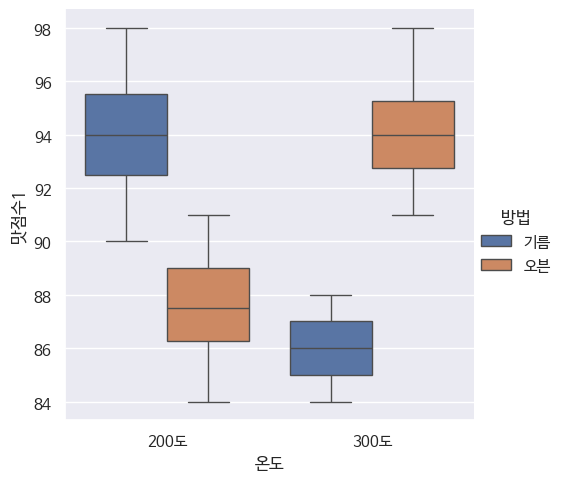

In [10]:
sns.catplot(data = twa_df,
            x = "온도",
            y = "맛점수1",
            hue = "방법",
            kind = "box")
plt.show()

## 4.TW-ANOVA

### 4.0 independent t-test로 한다면

In [11]:
# 온도
# p = 0.562, p >= 0.05 이므로 귀무가설(H0) 채택 -> 차이없음
x = twa_df['맛점수1'][twa_df['온도'] == '200도']
y = twa_df['맛점수1'][twa_df['온도'] == '300도']

In [12]:
pg.ttest(x, y, paired = False, alternative = "two-sided", correction = False).round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.583,58,two-sided,0.562,"[-1.55, 2.82]",0.151,0.303,0.088


In [13]:
# 방법
# p = 0.330, p >= 0.05 이므로 귀무가설(H0) 채택 -> 차이없음

x = twa_df['맛점수1'][twa_df['방법'] == '오븐']
y = twa_df['맛점수1'][twa_df['방법'] == '기름']

In [14]:
pg.ttest(x, y, paired = False, alternative = "two-sided", correction = False).round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.983,58,two-sided,0.33,"[-1.1, 3.24]",0.254,0.394,0.162


### 4.1 상호작용효과 있을때

In [15]:
# 온도 * 방법 : p = 0.000, p < 0.05 이므로 귀무가설(H0) 기각 -> 상호작용 있음
# ss_type = 3
pg.anova(dv = '맛점수1',
         between = ["온도","방법"],
         ss_type = 3,
         data = twa_df).round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,온도,6.446,1.0,6.446,1.719,0.195,0.030
1,방법,10.655,1.0,10.655,2.842,0.097,0.048
2,온도 * 방법,807.158,1.0,807.158,215.306,0.000,0.794
3,Residual,209.938,56.0,3.749,NaN,NaN,NaN


In [16]:
# post-hoc test: 상호작용효과 있을때
# 온도 * 방법(200도) : p = 0.000, p < 0.05 이므로 귀무가설(H0) 기각 -> 차이있음
# 온도 * 방법(300도) : p = 0.000, p < 0.05 이므로 귀무가설(H0) 기각 -> 차이있음

pg.pairwise_tests(dv = '맛점수1',
                  between = ["온도","방법"],
                  data = twa_df).round(3)

,Contrast,온도,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,온도,-,200도,300도,False,True,0.586,57.784,two-sided,0.56,0.303,0.149
1,방법,-,기름,오븐,False,True,-0.983,58.000,two-sided,0.33,0.394,-0.251
2,온도 * 방법,200도,기름,오븐,False,True,8.085,26.923,two-sided,0.00,7.154e+05,2.907
3,온도 * 방법,300도,기름,오븐,False,True,-13.734,24.478,two-sided,0.00,1.155e+11,-4.729


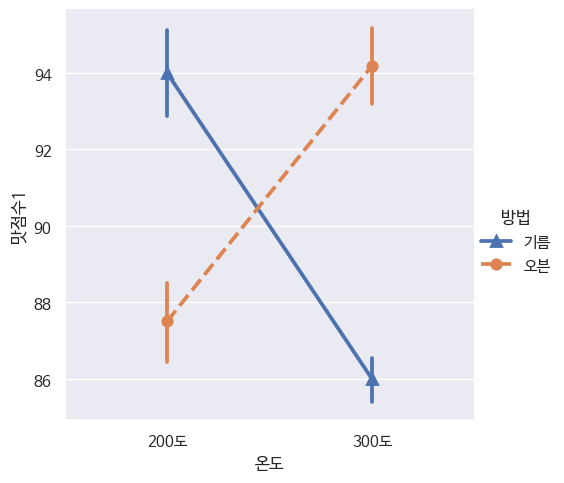

In [17]:
# 평균반응 프로파일 plot
sns.catplot(x = "온도",
            y = "맛점수1",
            hue = "방법",
            markers = ["^", "o"],
            linestyles = ["-", "--"],
            kind = "point",
            data = twa_df)
plt.show()

### 4.2 상호작용효과 없을때

In [18]:
# 상호작용효과 없을때, 2개 main효과만 있을때: ss_type = 2로 변경
# pg에서는 [온도 * 방법]과 [Residual]과 분리되서 나타남
pg.anova(dv = '맛점수2',
         between = ["온도","방법"],
         ss_type = 2,
         data = twa_df).round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,온도,55.548,1.0,55.548,12.555,0.001,0.183
1,방법,588.872,1.0,588.872,133.094,0.000,0.704
2,온도 * 방법,1.015,1.0,1.015,0.229,0.634,0.004
3,Residual,247.771,56.0,4.424,NaN,NaN,NaN


In [19]:
# 상호작용효과 제거모형
# pg모형는 지원안해서 statsmodels를 이용한 것과 비교
# 거의 유사함
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('맛점수2 ~ C(온도)+C(방법)', data = twa_df).fit()
sm.stats.anova_lm(model, typ=2).round(3)

,sum_sq,df,F,PR(>F)
C(온도),55.548,1.0,12.727,0.001
C(방법),588.872,1.0,134.918,0.000
Residual,248.786,57.0,NaN,NaN


In [20]:
# post-hoc test: 상호작용효과 없을 때
pg.pairwise_tests(dv = '맛점수2',
                  between = ["온도","방법"],
                  interaction = False,
                  data = twa_df).round(3)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,온도,200도,300도,False,True,-2.184,57.845,two-sided,0.033,1.873,-0.555
1,방법,기름,오븐,False,True,-10.708,58.000,two-sided,0.000,1.76e+12,-2.729


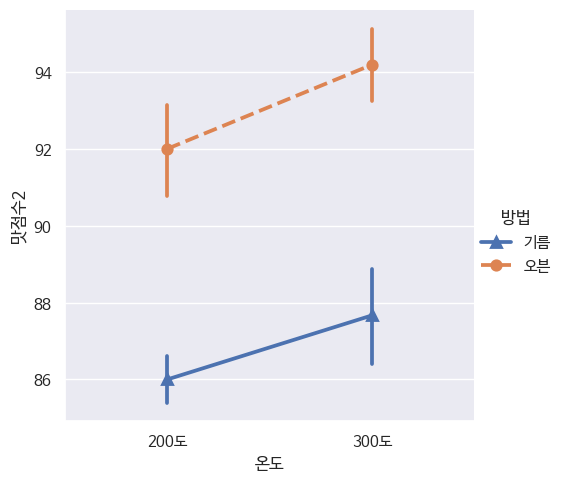

In [21]:
# 평균반응 프로파일 plot
sns.catplot(x = "온도",
            y = "맛점수2",
            hue = "방법",
            markers = ["^", "o"],
            linestyles = ["-", "--"],
            kind = "point",
            data = twa_df)
plt.show()

### 4.3 상호작용효과 없을때, 1개 main효과만 있을때

In [22]:
# ss_type = 2
pg.anova(dv = '맛점수3',
         between = ["온도","방법"],
         ss_type = 2,
         data = twa_df).round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,온도,807.484,1.0,807.484,215.393,0.000,0.794
1,방법,10.120,1.0,10.120,2.699,0.106,0.046
2,온도 * 방법,6.446,1.0,6.446,1.719,0.195,0.030
3,Residual,209.938,56.0,3.749,NaN,NaN,NaN


In [23]:
# post-hoc test: 상호작용효과 없을 때
pg.pairwise_tests(dv = '맛점수3',
                  between = ["온도","방법"],
                  interaction = False,
                  data = twa_df).round(3)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,온도,200도,300도,False,True,-14.527,57.344,two-sided,0.00,4.679e+17,-3.682
1,방법,기름,오븐,False,True,-0.983,58.000,two-sided,0.33,0.394,-0.251


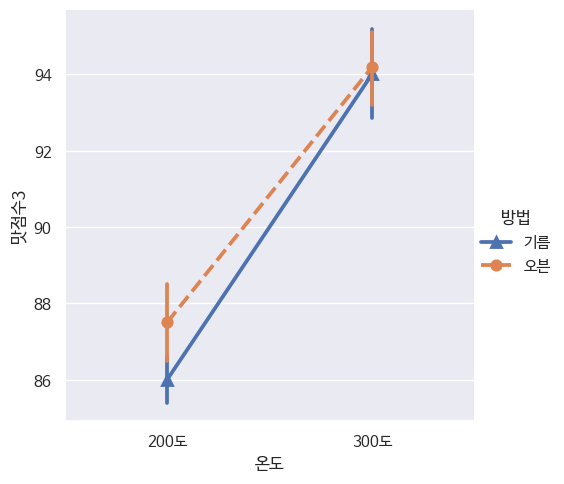

In [24]:
# 평균반응 프로파일 plot
sns.catplot(x = "온도",
            y = "맛점수3",
            hue = "방법",
            markers = ["^", "o"],
            linestyles = ["-", "--"],
            kind = "point",
            data = twa_df)
plt.show()

## 5.등분산검정
- 변수가 2개 이므로 bioinfokit package 사용

In [ ]:
!pip install bioinfokit

In [26]:
from bioinfokit.analys import stat
res = stat()
res.levene(df=twa_df, res_var='맛점수1', xfac_var=['온도', '방법'])
res.levene_summary

,Parameter,Value
0,Test statistics (W),1.4620
1,Degrees of freedom (Df),3.0000
2,p value,0.2347


## 6.정규성 검정

In [27]:
# 잔차의 정규성을 검정해야 함
# pg 모형는 잔차가 없어서 statsmodels를 이용해야 함
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('맛점수1 ~ C(온도)+C(방법)+C(온도):C(방법)', data = twa_df)
result = model.fit()
pg.normality(result.resid).round(3)

,W,pval,normal
0,0.981,0.475,True
